<a href="https://colab.research.google.com/github/ghgv/Neural_net/blob/master/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

rows= 4 
z1: 
0.7606051344021186
z2: 
0.7606051344021186
z1: 
0.8053480679404825
z2: 
0.7697264496438416
z1: 
0.7555976977106396
z2: 
0.7505005372099336
z1: 
0.8041301036140319
z2: 
0.7678398128350362
z1: 
0.7204918663748525
z2: 
0.717618446356383
z1: 
0.7528884987657861
z2: 
0.7334466039401968
z1: 
0.7146542254762158
z2: 
0.6995400680785802
z1: 
0.7455165665797716
z2: 
0.7249288425336999
z1: 
0.6753305638138601
z2: 
0.6735918891071625
z1: 
0.6883901988142049
z2: 
0.7002619477895938
z1: 
0.6713168396261892
z2: 
0.6475256629061811
z1: 
0.6758115859846263
z2: 
0.686298532116395
z1: 
0.6305071073810592
z2: 
0.6321600055470064
z1: 
0.6180576352225103
z2: 
0.6736567618906656
z1: 
0.6320753462109723
z2: 
0.5986507124246477
z1: 
0.603983144950293
z2: 
0.6557359115533427
z1: 
0.5928038467465107
z2: 
0.5958233548861074
z1: 
0.5519173693923969
z2: 
0.6551117482177026
z1: 
0.602862198389923
z2: 
0.5555368804592844
z1: 
0.5405130345072656
z2: 
0.6343505107412997
z1: 
0.5661664422398512
z2: 
0.5654

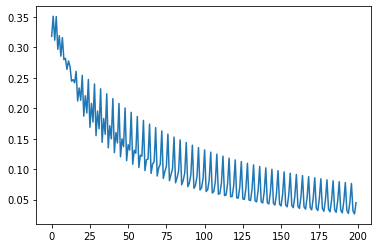

[[ 1.21216928]
 [-1.22951785]]
0.7706825537914593
0.22626582428041583


In [10]:
import numpy as np
import matplotlib.pyplot as plt

sigmoid=1
binary_cross_entropy=0

W0=1
B1=1

W= np.array([[0.1 , 0.3, 0.4, 1],  
             [0.1 , 0.3, 0.4, 1]])

X =np.array([[0.1, 0.3, 0.14],
             [0.2, 0.15, 0.76],
             [0.096, 0.64, 0.05],
             [0.073, 0.6, 0.8]])
# 
D = np.array([[1,0,1,0],  #even
              [0,1,0,1]]) #odd

(a,b)=X.shape
#add a column of 1 to make up for the bias
bias = np.array([[1], [1], [1], [1]]) 

X=np.append(X,bias,axis=1) 
z=0.0000001
rate=1
Error=[]
print("rows= %i " % a)
for k in range(50):
    #print("Epoch[%i] " %k)
    for i in range(b+1):
        
        W1=W[0,:]
        XT=X.T
        #print the different entries
        #print("Xs (is transposed):")
        #print(XT)
        #print("Ws:")
        #print(W)
        
        h1=XT[:,i].dot(W[0,:].T)
        h2=XT[:,i].dot(W[1,:].T)
        #print("h1: ")
        #print(np.sum(h1))
        #print("h2: ")
        #print(np.sum(h2))
        z1=1/(1+np.exp(-np.sum(h1)))
        z2=1/(1+np.exp(-np.sum(h2)))
        print("z1: ")
        print(z1)  
        print("z2: ")
        print(z2)  
        if (sigmoid==1):
          #print("D[0,%i]: " % i)
          #print(D[0,0])  
          dp1dz1=D[0,i]-z1
          #print("dpdz1= ")
          #print(dp1dz1)
          dz1dp1=(z1*(1-z1))
          #print("dz1dp1")
          #print(dz1dp1)

          #print("D[1,%i]: " % i)
          #print(D[1,0])  
          dp2dz2=D[1,i]-z2
          #print("dpdz2= ")
          #print(dp2dz2)
          dz2dp2=(z2*(1-z2))
          #print("dz2dp2")
          #print(dz2dp2)
        if (binary_cross_entropy==1):
          dp1dz1=-0.5*((D[0,i]*np.log(z1)+(1-D[0,i])*np.log(1-z1))+(D[1,i]*np.log(z2)+(1-D[1,i])*np.log(1-z2)))
          dp2dz2=-0.5*((D[1,i]*np.log(z1)+(1-D[1,i])*np.log(1-z1))+(D[0,i]*np.log(z2)+(1-D[0,i])*np.log(1-z2)))
          dz1dp1=(z1*(1-z1))
          dz2dp2=(z2*(1-z2))


        #print("XT[%i]" % i )
        ##print(XT[0,i])
        #print(XT[1,i])
        #print(XT[2,i])

        dp1dw11=dp1dz1*dz1dp1*XT[0,i]
        dp1dw12=dp1dz1*dz1dp1*XT[1,i]
        dp1dw13=dp1dz1*dz1dp1*XT[2,i]
        dp1dw14=dp1dz1*dz1dp1
        
        dp2dw21=dp2dz2*dz2dp2*XT[0,i]
        dp2dw22=dp2dz2*dz2dp2*XT[1,i]
        dp2dw23=dp2dz2*dz2dp2*XT[2,i]
        dp2dw24=dp2dz2*dz2dp2


        Wp=np.array([[dp1dw11, dp1dw12, dp1dw13, dp1dw14],
                     [dp2dw21 ,dp2dw22 ,dp2dw23 ,dp2dw24]])
        W=W+rate*Wp
        #print("New W:")
        #print(W)
        error=0.5*(D[0,i]-z1)*(D[0,i]-z1)+0.5*(D[1,i]-z2)*(D[1,i]-z2)
        #print("Error %f" % error)
        Error.append(error)
plt.plot(Error)
plt.show()

X_test=np.array([[0.096, 0.64, 0.15,1]])
c=W.dot(X_test.T)
print(c)
print(1/(1+np.exp(-c[0,0])))
print(1/(1+np.exp(-c[1,0])))
